<a href="https://colab.research.google.com/github/ARPIT-SINGHAL-22102003/Sentiment-Analysis/blob/main/feedback_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install pandas

In [29]:
import pandas as pd
#loding dataset
df = pd.read_csv('/content/Customer_support_data.csv')
print(df.head())

                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/2023 12:52   
2  c273368d-b961-

In [30]:
print(df.columns)

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')


In [31]:
# Make column names lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [32]:
# Show only the feedback column
print(df['customer_remarks'].head())

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: customer_remarks, dtype: object


In [33]:
# Drop rows where feedback is missing
df = df.dropna(subset=['customer_remarks'])

In [36]:
df.to_csv("cleaned_feedback.csv", index=False)

In [34]:
# removing puctuation
import re

# Define a cleaning function
def clean_text(text):
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces
    text = re.sub(r'\s+', ' ', text)      # Remove extra spaces
    return text.strip()

# Apply to the column
df['customer_remarks'] = df['customer_remarks'].apply(clean_text)

In [35]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['customer_remarks'] = df['customer_remarks'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
print(df['customer_remarks'].head())

7                                              ery good
8     hopzilla app coustomer care services good serv...
11                                              ery bad
17                                             omething
19                                                 good
Name: customer_remarks, dtype: object


In [38]:
pip install textblob

In [39]:
from textblob import TextBlob
def get_sentiment(text):
  blob = TextBlob(text)
  return pd.Series({
      'polarity': blob.sentiment.polarity,

      #Range: [-1.0, 1.0]
      'subjectivity': blob.sentiment.subjectivity
      # Range: [0.0, 1.0]
  })

In [40]:
# applying to the data frame
sentiment_scores = df['customer_remarks'].apply(get_sentiment)
df = pd.concat([df, sentiment_scores], axis=1)

In [41]:
# classifying the sentiments
def classify_sentiment(polarity):
    if polarity > 0.2:
        return 'positive'
    elif polarity < -0.2:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['polarity'].apply(classify_sentiment)

In [42]:
df[['customer_remarks', 'polarity', 'subjectivity', 'sentiment_label']].head(10).style.set_properties(**{
    'background-color': '#f9f9f9',
    'border': '1px solid #ccc',
    'padding': '5px',
    'color': 'black'
})

,customer_remarks,polarity,subjectivity,sentiment_label
7,ery good,0.700000,0.600000,positive
8,hopzilla app coustomer care services good service provided time,0.700000,0.600000,positive
11,ery bad,-0.700000,0.666667,negative
17,omething,0.000000,0.000000,neutral
19,good,0.700000,0.600000,positive
21,ood,0.000000,0.000000,neutral
23,odd job,-0.166667,0.250000,neutral
25,ssue resolved pathetic service,-1.000000,1.000000,negative
27,xcellent,0.000000,0.000000,neutral
29,ery good,0.700000,0.600000,positive


/tmp/ipython-input-883337231.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


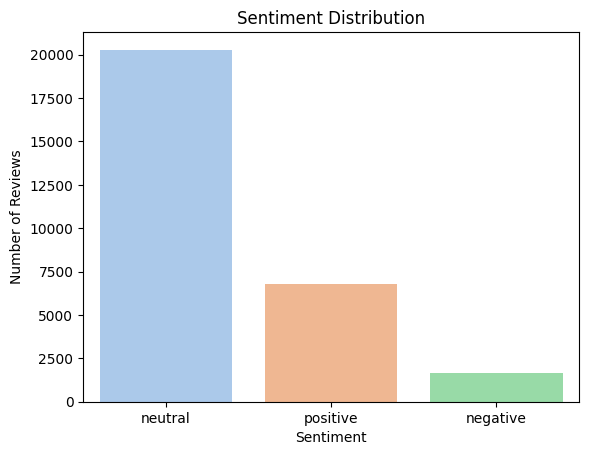

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count sentiment labels
sentiment_counts = df['sentiment_label'].value_counts()

# Plot
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


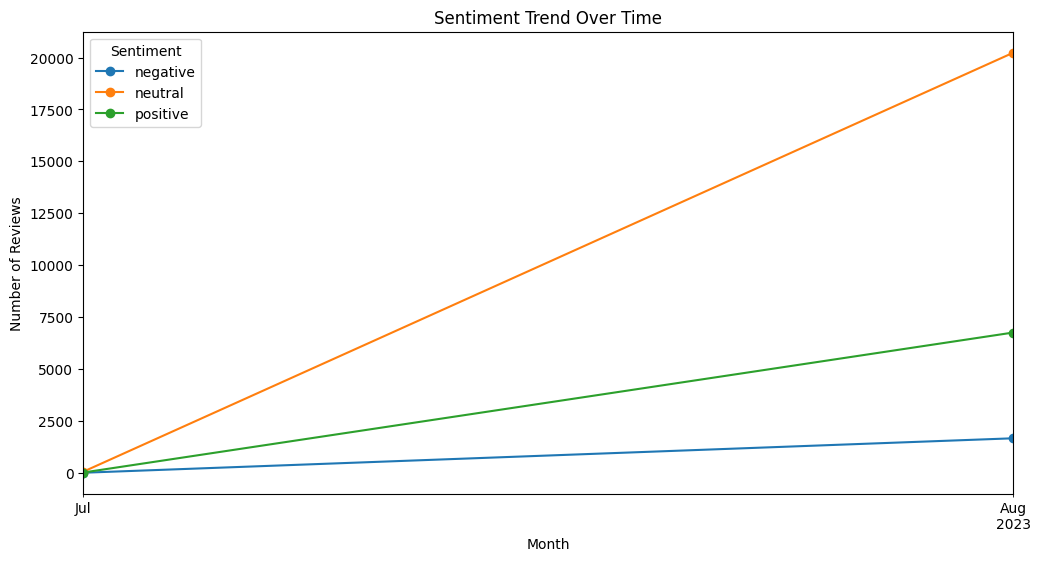

In [27]:
# Ensure 'issue_reported_at' column is datetime
df['issue_reported_at'] = pd.to_datetime(df['issue_reported_at'], format='%d/%m/%Y %H:%M')

# Group by date and sentiment
trend_data = df.groupby([df['issue_reported_at'].dt.to_period('M'), 'sentiment_label']).size().unstack().fillna(0)

# Plot
trend_data.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()